In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
data=pd.read_csv('Iris.csv')
data.drop('Id',axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data['Species'].drop_duplicates()
data['Species']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':-1,'Iris-virginica':1})
data=data[data['Species']!=0]


In [76]:
class Perceptron:
    def __init__(self,alpha,times):
        self.alpha=alpha
        self.times=times
    def step(self,z):
        return np.where(z>=0,1,-1)
    def fit(self,X,y):
        X=np.asarray(X)
        y=np.asarray(y)
        self.loss_=[]
        self.w=np.zeros(1+X.shape[1])
        
        for i in range(self.times):
            loss=0
            for x,target in zip(X,y):
                y_hat=self.step(np.dot(x,self.w[1:])+self.w[0])
                loss+=target!=y_hat
                self.w[0]+=self.alpha*(target-y_hat)
                self.w[1:]+=self.alpha*(target-y_hat)*x
            self.loss_.append(loss)
    def predict(self,X):
        y_hat=self.step(np.dot(X,self.w[1:])+self.w[0])
        return y_hat
        

In [84]:
t=data.sample(len(data),random_state=0)
train_X=t.iloc[:70,:-1]
train_y=t.iloc[:70,-1]
test_X=t.iloc[70:,:-1]
test_y=t.iloc[70:,-1]

pt=Perceptron(alpha=0.5,times=600)
pt.fit(train_X,train_y)
y_hat=pt.predict(test_X)
display(y_hat)
display(test_y.values)

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1])

array([-1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1])

In [85]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

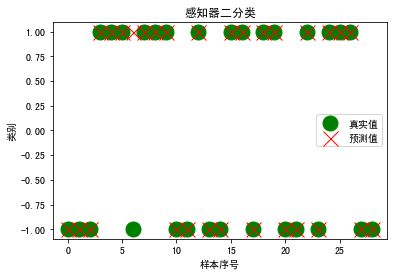

In [86]:
# 绘制真实值
plt.plot(test_y.values, "go", ms=15, label="真实值")
# 绘制预测值
plt.plot(y_hat, "rx", ms=15, label="预测值")
plt.title("感知器二分类")
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.legend()
plt.show()